In [180]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import root_pandas
import pandas as pd
from keras.models import load_model
import ROOT as R
#sns.set(color_codes=True)

In [181]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)
df = root_pandas.read_root('/srv/data/hosein47/Analysis/Analysis_BKGx1_etau_signal_all_pi.root',key='pi')
X = df.iloc[:,[1,3]]
y = df.iloc[:,11]
y=pd.DataFrame(y)
data=X.join(y)
data.head()

,cosTheta,pt,isSignal
0,-0.1429554205,0.2091287763,0.0000000000
1,-0.2306341767,0.6453799708,1.0000000000
2,-0.4378549210,1.7496583664,0.0000000000
3,0.0501622572,0.1162232391,1.0000000000
4,0.3266299064,0.5602276571,1.0000000000


In [182]:
#bins_pt = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
#bins_ct=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
#data['binned_pt'] = pd.cut(data['pt'], bins_pt,labels=[1,2,3,4,5,6,7,8])
#data['binned_ct']= pd.cut(data['cosTheta'], bins_ct, labels=['a','b','c','d','e','f','g','h'])
#data.head()
#sns.catplot(x="binned_pt", y="binned_pt", data=data)
#new_ct=data['cosTheta'].value_counts(bins=40)
#new_pt=data['pt'].value_counts(bins=40)


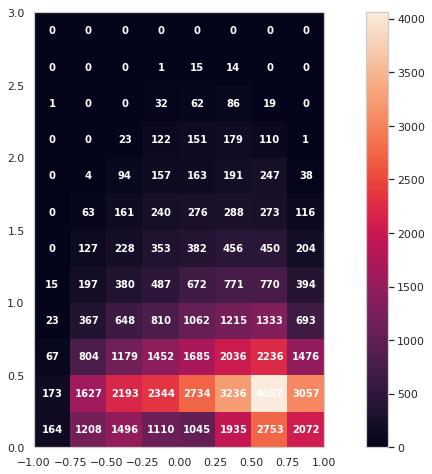

In [187]:
plt.figure(figsize=[15,8])

H_signal, xedges_1, yedges_1,im = plt.hist2d(x=data['cosTheta'], y=data['pt'], bins=(8,12), range=[[-1, 1], [0, 3]], weights=data['isSignal']==1, normed=False)
extent = [0,3, 1, -1]
plt.imshow(H_signal, extent=extent,interpolation='nearest')

for i in range(len(xedges_1)-1):
    for j in range(len(yedges_1)-1):
        plt.text(xedges_1[i]+0.125,yedges_1[j]+0.125, int(H_signal[i,j]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.show()

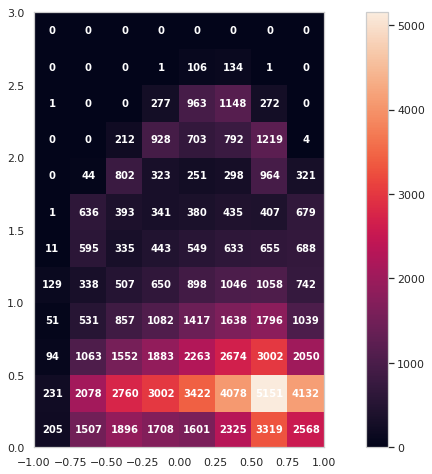

In [184]:
plt.figure(figsize=[15,8])

H_all, xedges_2, yedges_2 ,im = plt.hist2d(x=data['cosTheta'],y=data['pt'], bins=(8,12),range=[[-1, 1], [0, 3]])
extent = [0,3, 1, -1]
plt.imshow(H_all, extent=extent,interpolation='nearest')

for i in range(len(xedges_2)-1):
    for j in range(len(yedges_2)-1):
        plt.text(xedges_2[i]+0.125,yedges_2[j]+0.125, int(H_all[i,j]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.show()

/cvmfs/belle.cern.ch/ubuntu1804/externals/v01-07-01/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/cvmfs/belle.cern.ch/ubuntu1804/externals/v01-07-01/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


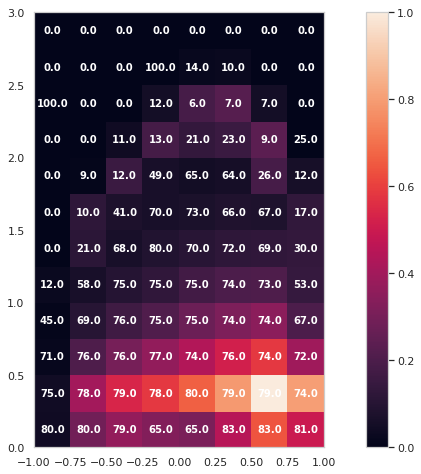

In [185]:
plt.figure(figsize=[15,8])

H_signal, xedges, yedges, im = plt.hist2d(x=data['cosTheta'], y=data['pt'], bins=(8,12), range=[[-1, 1], [0, 3]], weights=data['isSignal']==1,normed=False)
H_all, xedges, yedges, im = plt.hist2d(x=data['cosTheta'],y=data['pt'], bins=(8,12),range=[[-1, 1], [0, 3]])
extent = [0,3, 1, -1]
plt.imshow(H_signal/H_all, extent=extent,interpolation='nearest')

for i in range(len(xedges)-1):
    for j in range(len(yedges)-1):
        plt.text(xedges[i]+0.125,yedges[j]+0.125, np.around((np.nan_to_num(H_signal/H_all))[i,j]*100,decimals=0), 
                 color="w", ha="center", va="center", fontweight="bold")
plt.colorbar()
plt.show()

In [179]:
plt.figure(figsize=[15,8])
H1=pd.DataFrame(H_signal)
H2=pd.DataFrame(H_all)
prior=(H1/H2)*100
prior.replace(np.nan, 0, inplace=True)
prior.head()
#sns.heatmap(prior)

,0,1,2,3,4,5,6,7,8,9,10,11
0,80.0000000000,74.8917748918,71.2765957447,45.0980392157,11.6279069767,0.0000000000,0.0000000000,0.0000000000,0.0000000000,100.0000000000,0.0000000000,0.0000000000
1,80.1592568016,78.2964388835,75.6349952963,69.1148775895,58.2840236686,21.3445378151,9.9056603774,9.0909090909,0.0000000000,0.0000000000,0.0000000000,0.0000000000
2,78.9029535865,79.4565217391,75.9664948454,75.6126021004,74.9506903353,68.0597014925,40.9669211196,11.7206982544,10.8490566038,0.0000000000,0.0000000000,0.0000000000
3,64.9882903981,78.0812791472,77.1109930961,74.8613678373,74.9230769231,79.6839729120,70.3812316716,48.6068111455,13.1465517241,11.5523465704,100.0000000000,0.0000000000
4,65.2717051843,79.8947983635,74.4586831639,74.9470712773,74.8329621381,69.5810564663,72.6315789474,64.9402390438,21.4793741110,6.4382139148,14.1509433962,0.0000000000


<Figure size 1080x576 with 0 Axes>

DEBUG:matplotlib.colorbar] locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7efddd1186a0>
DEBUG:matplotlib.colorbar] Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar] locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7efddd1186a0>
DEBUG:matplotlib.colorbar] Setting pcolormesh
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos


Automatically created module for IPython interactive environment


DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos
DEBUG:matplotlib.axes._base] update_title_pos


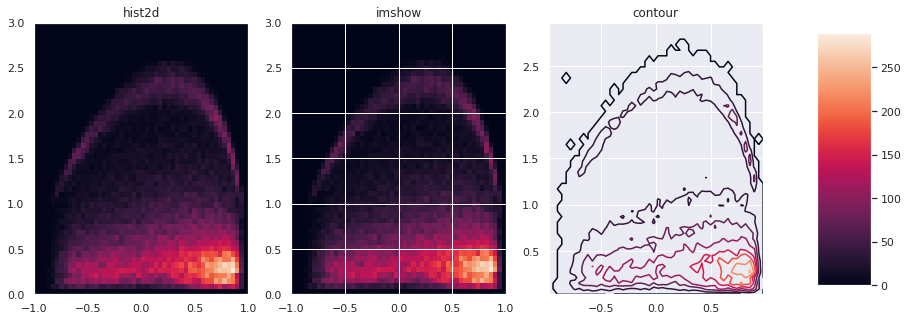

In [18]:
print(__doc__)
import rootpy
from rootpy.plotting import root2matplotlib as rplt
from rootpy.plotting import Hist2D

a = Hist2D(50, -1, 1, 50, 0, 3)
a.fill_array(data.iloc[:,[0,1]].values)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.set_title('hist2d')
rplt.hist2d(a, axes=ax1)

ax2.set_title('imshow')
im = rplt.imshow(a, axes=ax2)

ax3.set_title('contour')
rplt.contour(a, axes=ax3)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

if not R.gROOT.IsBatch():
    plt.show()